In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


**1-1. Upload and investigate data:** upload data and investigat its structures. How many features do it have?  

Following the data is uploaded. It has 10 features.

In [ ]:
# To import data file from my PC to Colab
from google.colab import files
files = files.upload()

Saving challenge.txt to challenge.txt


In [ ]:
# To import data file from Colab to my notebook
data_df = pd.read_csv("challenge.txt", delimiter='\t', header=None)
data_df.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.768094,-1.062899,-1.502895,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.326407,-0.725706,-1.436839,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.870501,-0.944614,-0.796163,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.198228,-0.633996,-1.031985,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.581253,-0.839979,-0.762256,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Is there null data in Data Frame?**

Following, I get overal information about data. It is clear that, there is no null data.

In [ ]:
data_df.info() # There is no null data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   float64
 8   8       1000 non-null   float64
 9   9       1000 non-null   float64
dtypes: float64(10)
memory usage: 78.3 KB


In [ ]:
# To find the number of 0 in each dimension
zero_numbers = []
for column in data_df.columns:
  zero_numbers.append(len(np.where(data_df.iloc[:, column]==0)[0]))
zero_numbers

[0, 0, 0, 600, 800, 800, 800, 800, 800, 800]

**Visualization:**

To get more information about data, pairplot of data is plotted. As it is clear, some features (from 4 to 10) are often distribute around zero.  

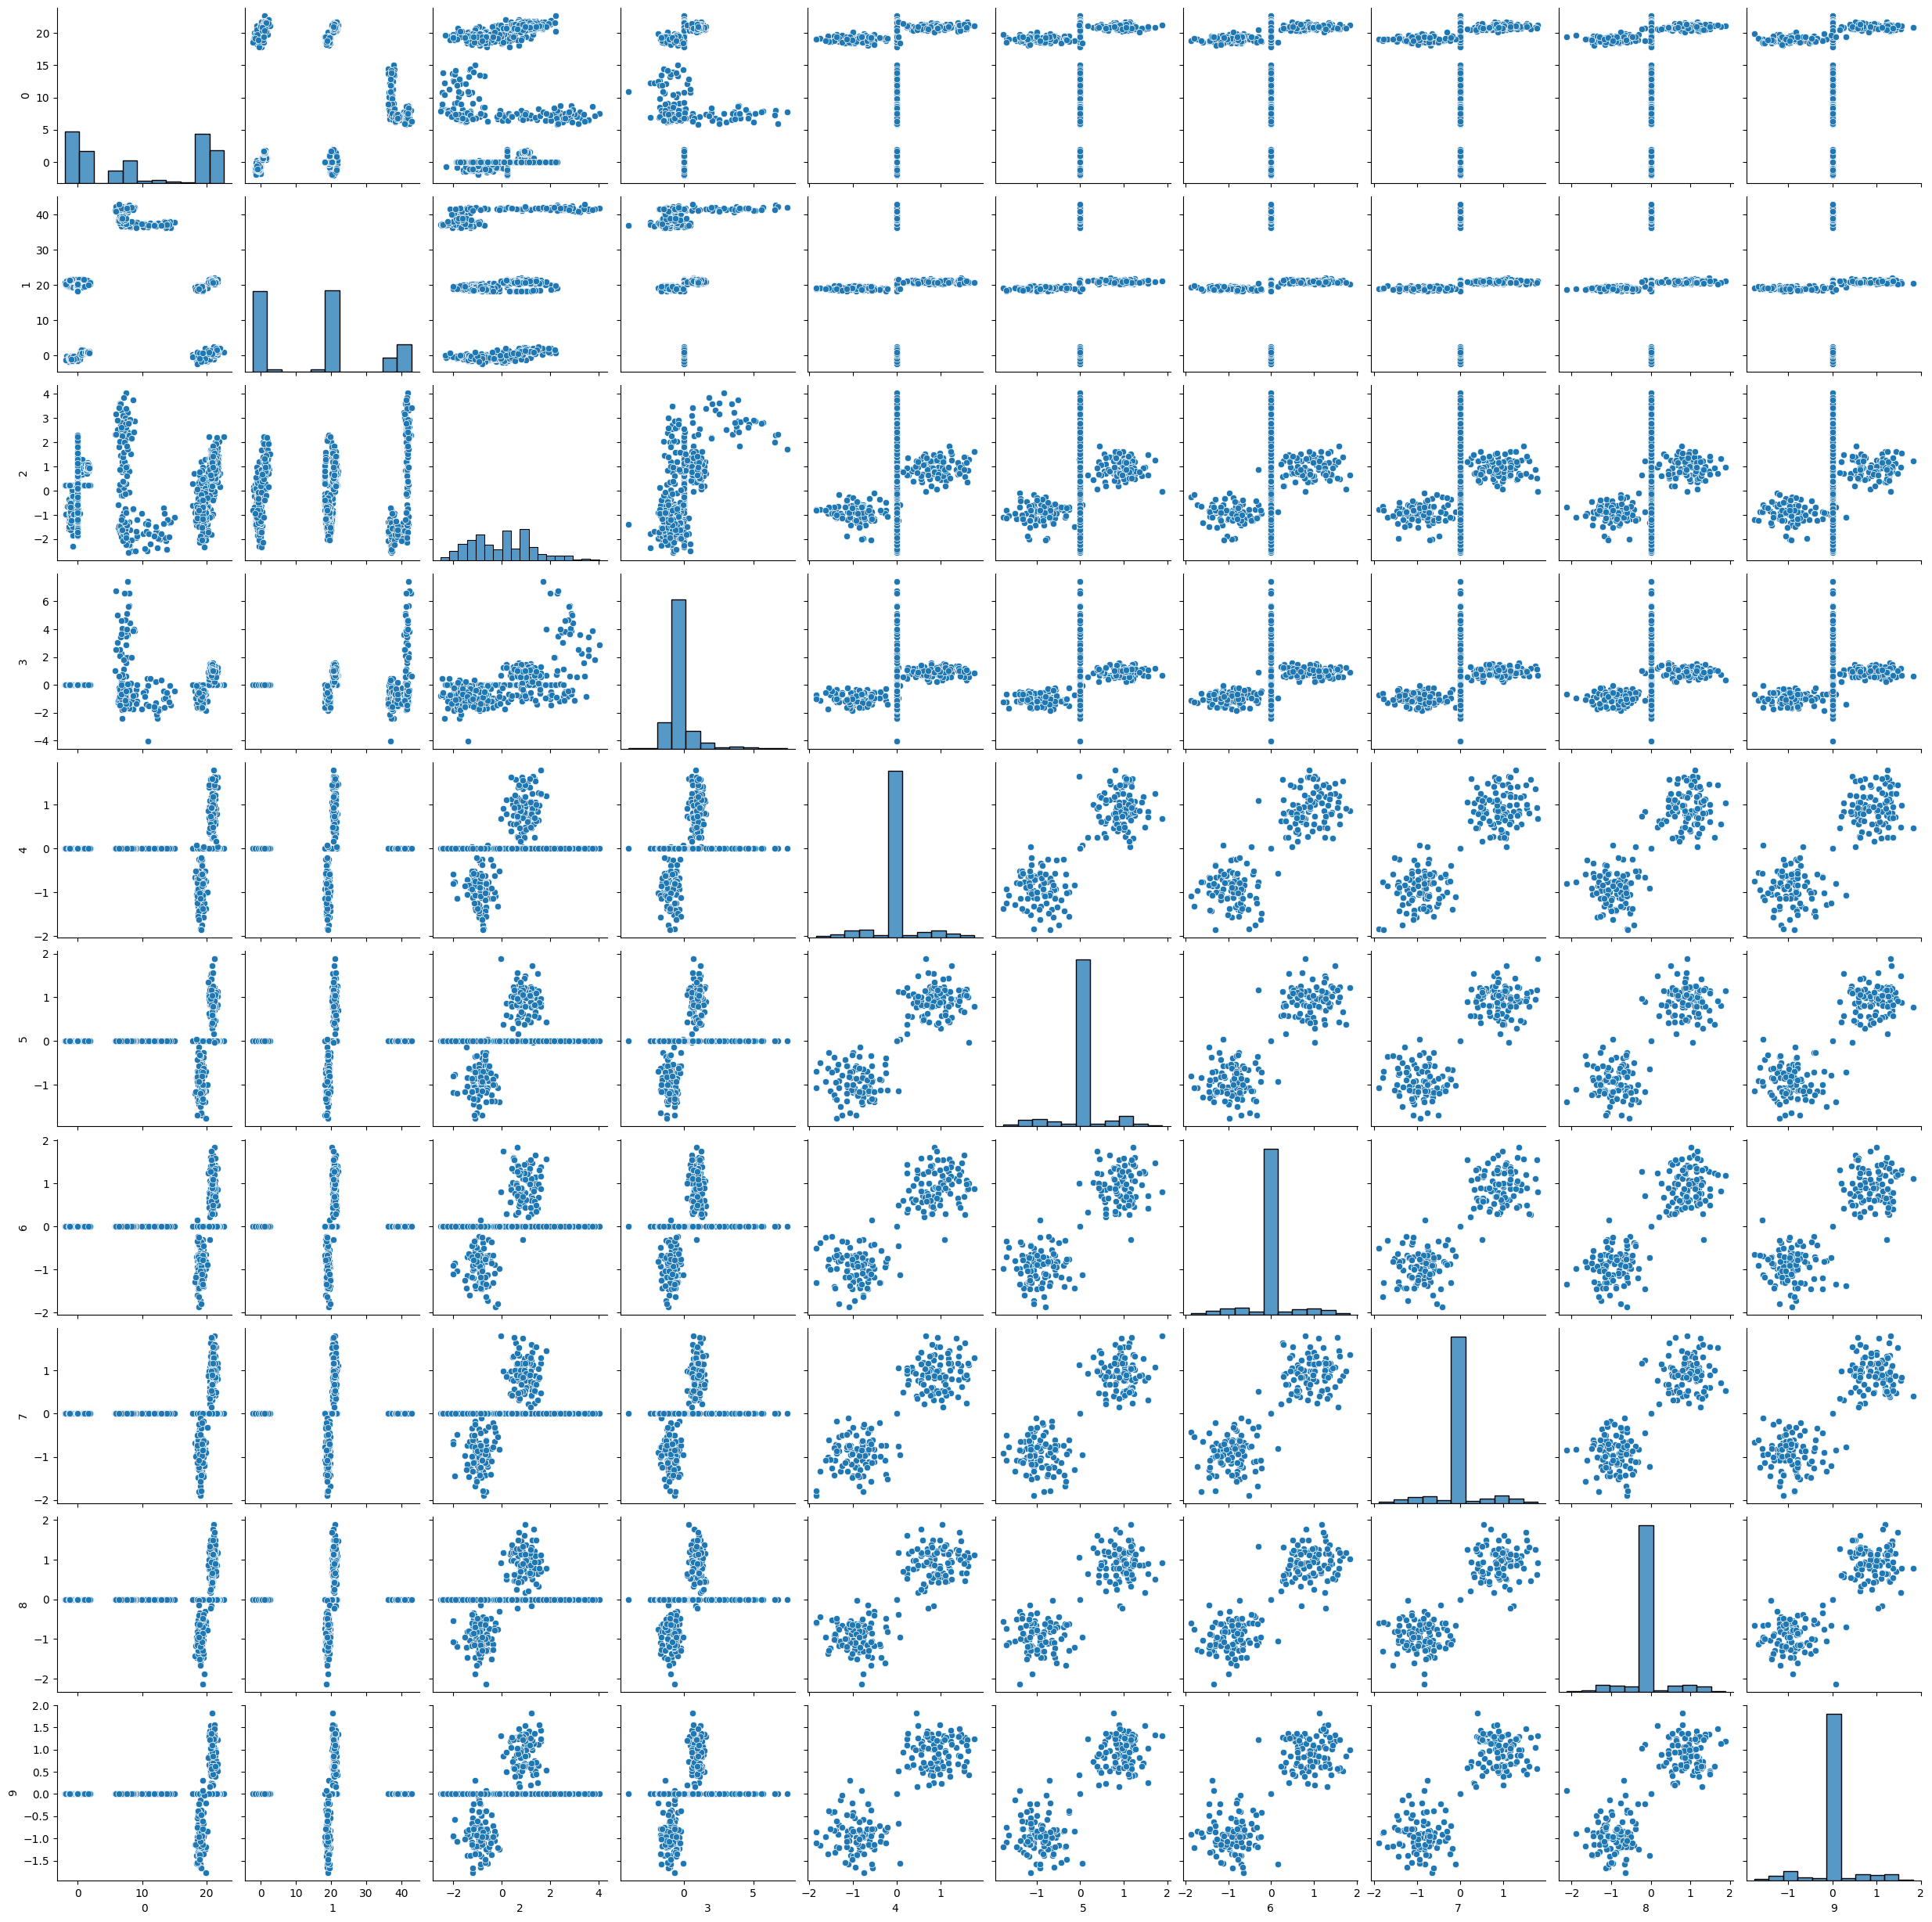

In [ ]:
sns.pairplot(data_df)

Also the scatter plot of 3 first features, which have no zero data, is plotted. clustering pattern of data for these features is observable.  



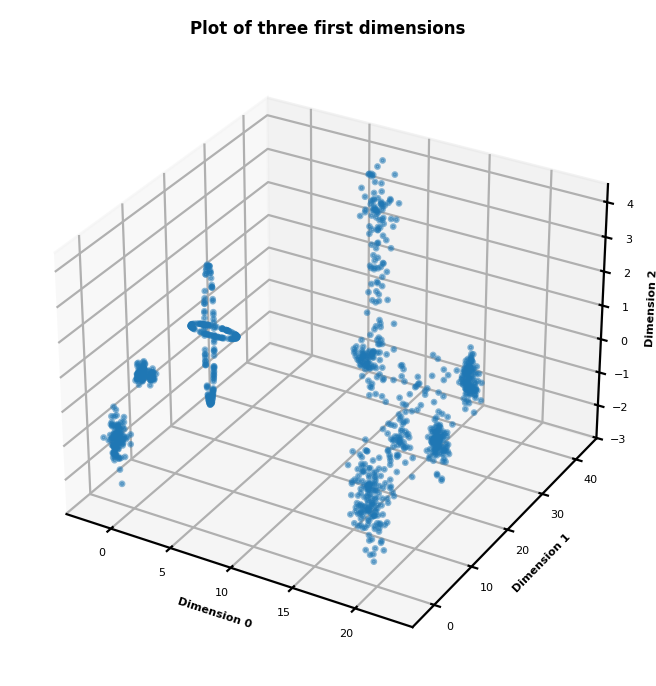

In [ ]:
fig = plt.figure(figsize=(6, 4), dpi=200)
ax = fig.add_subplot(111, projection = "3d" )
ax.scatter(data_df.iloc[:, 0], data_df.iloc[:, 1], data_df.iloc[:, 2], s=2, alpha=0.5)

ax.set_xlabel("Dimension 0", fontsize=4, labelpad=-10, weight="bold")
ax.tick_params(axis='x', labelsize=4, pad=-3)

ax.set_ylabel("Dimension 1", fontsize=4, labelpad=-10, weight="bold")
ax.tick_params(axis='y', labelsize=4, pad=-3)

ax.set_zlabel("Dimension 2", fontsize=4, labelpad=-10, weight="bold")
ax.tick_params(axis='z', labelsize=4, pad=-3)

ax.set_title("Plot of three first dimensions"  , fontsize=6, loc="center", weight="bold");

**1-2. Dimensionality reduction and visualization:**

In the next cells 3 different methods of dimensionality reduction PCA, t-SNE and UMAP will be applied to data.
As it's observable dimensionality reduction with diffrent methods, which althoug each relies on different chracteristics of data, shows that data has clustering structure.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# To import PCA and fit_transform it on data
from sklearn.decomposition import PCA
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_df)
# To fit data to 2 dimensions
pca_2d = PCA(n_components=2)
# To fit data to 3 dimensions
pca_3d = PCA(n_components=3)

In [ ]:
# To transform the 10 dimensional original feature space to 2 & 3 lower dimension space
X_pca_2d = pca_2d.fit_transform(data_normalized)
X_pca_3d = pca_3d.fit_transform(data_normalized)
print(f" The shape of 2d reduced features is: {(X_pca_2d.shape)} and 3d is: {(X_pca_3d.shape)}")

 The shape of 2d reduced features is: (1000, 2) and 3d is: (1000, 3)


In [ ]:
# To find the variance ratios of transformed data to 2 reduced dimensions
for pca in pca_2d.explained_variance_ratio_:
  print(f"{pca:0.3f}")

0.569
0.120


In [ ]:
# To find the variance ratios of transformed data to 3 reduced dimensions
for pca in pca_3d.explained_variance_ratio_:
  print(f"{pca:0.3f}")

0.569
0.120
0.106


As it can see above, approximately 0.689 and 0.795 of variance (information) are captured using 2d and 3d Principal Components Analysis, respectively. Now it's time to plot the features of reduced space.   

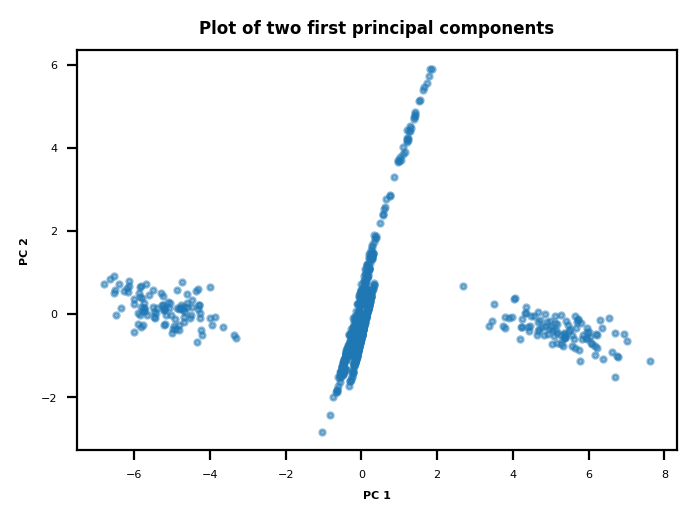

In [ ]:
# To plot 2 first principal componennts of data using PCA
fig = plt.figure(figsize=(3, 2), dpi=200)
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(X_pca_2d[:, 0], X_pca_2d[:, 1], "o", markersize=2, alpha=0.5)
ax.set_title("Plot of two first principal components"  , fontsize=6, loc="center", weight="bold")

ax.set_xlabel("PC 1", fontsize=4, weight="bold")
ax.tick_params(axis='x', labelsize=4)

ax.set_ylabel("PC 2", fontsize=4, weight="bold")
ax.tick_params(axis='y', labelsize=4);


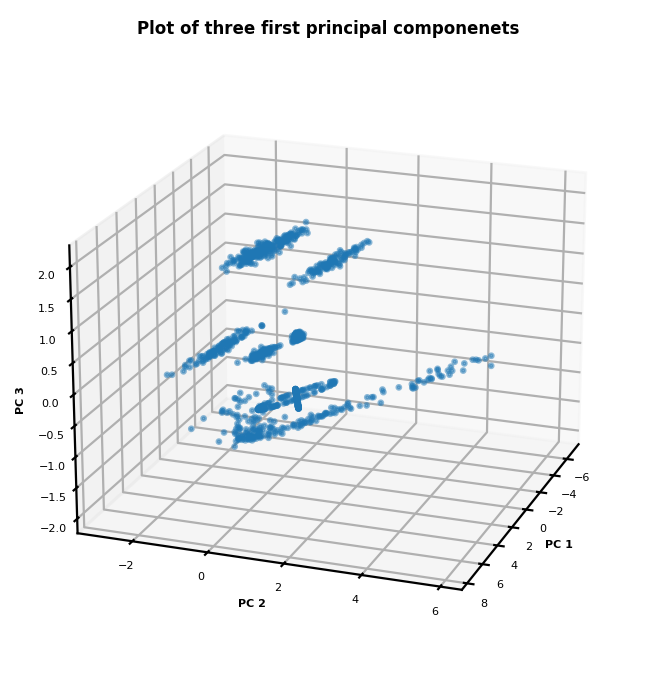

In [ ]:
# To plot 3 first principal componennts of data using PCA
fig = plt.figure(figsize=(6, 4), dpi=200)
ax = fig.add_subplot(111, projection = "3d" )
ax.view_init(20, 20)
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], s=2, alpha=0.5)

ax.set_xlabel("PC 1", fontsize=4, labelpad=-10, weight="bold")
ax.tick_params(axis='x', labelsize=4, pad=-3)

ax.set_ylabel("PC 2", fontsize=4, labelpad=-10, weight="bold")
ax.tick_params(axis='y', labelsize=4, pad=-3)

ax.set_zlabel("PC 3", fontsize=4, labelpad=-10, rotation=90, weight="bold")
ax.tick_params(axis='z', labelsize=4, pad=-3)

ax.set_title("Plot of three first principal componenets"  , fontsize=6, loc="center", weight="bold");

Now t_SNE Method will be used for Dimensionality Reduction. As you Know this method is rely on preserving neighboring points from mapping high dimension to a lower one.

In [ ]:
# To import TSNE
from sklearn.manifold import TSNE

In [ ]:
# To fit data to 2 dimensions using t-SNE
tsne_2d = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
# To fit data to 3 dimensions using t-SNE
tsne_3d = TSNE(n_components=3, perplexity=30, random_state=42, n_iter=1000)

In [ ]:
# To transform the 10 dimensional original features space to 2 & 3 lower dimension space with t_SNE
X_tsne_2d = tsne_2d.fit_transform(data_normalized)
X_tsne_3d = tsne_3d.fit_transform(data_normalized)
print(f" The shape of 2d reduced features is: {(X_tsne_2d.shape)} and 3d is: {(X_tsne_3d.shape)}")

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


 The shape of 2d reduced features is: (1000, 2) and 3d is: (1000, 3)


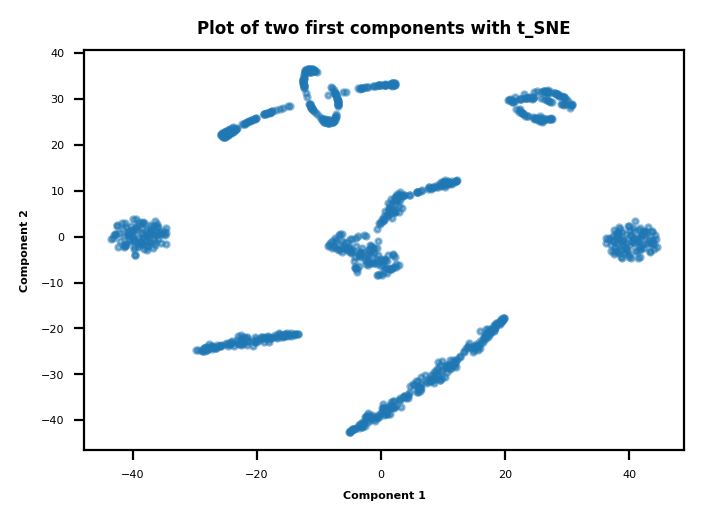

In [ ]:
# To plot 2 first principal componennts of data using t-SNE
fig = plt.figure(figsize=(3, 2), dpi=200)
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(X_tsne_2d[:, 0], X_tsne_2d[:, 1], "o", markersize=2, alpha=0.5)
ax.set_title("Plot of two first components with t_SNE"  , fontsize=6, loc="center", weight="bold")

ax.set_xlabel("Component 1", fontsize=4, weight="bold")
ax.tick_params(axis='x', labelsize=4)

ax.set_ylabel("Component 2", fontsize=4, weight="bold")
ax.tick_params(axis='y', labelsize=4);

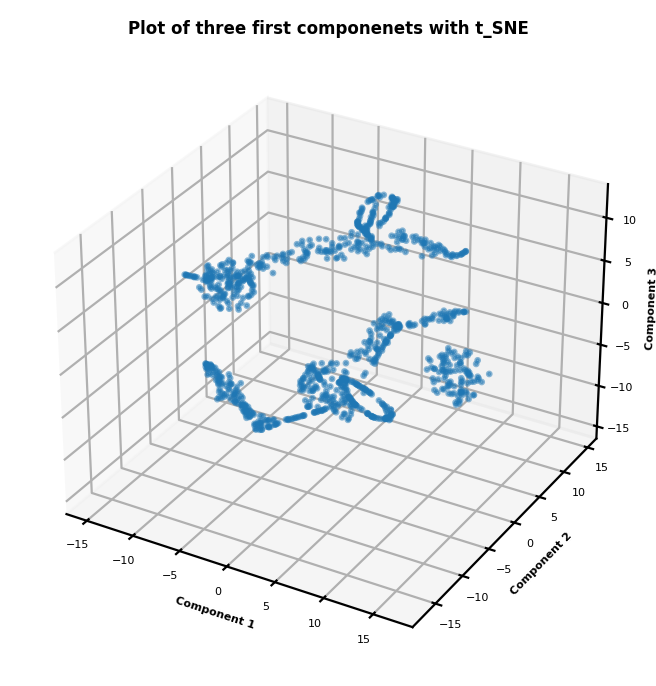

In [ ]:
# To plot 3 first principal componennts of data using t-SNE
fig = plt.figure(figsize=(6, 4), dpi=200)
ax = fig.add_subplot(111, projection = "3d" )
ax.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2], s=2, alpha=0.5)

ax.set_xlabel("Component 1", fontsize=4, labelpad=-10, weight="bold")
ax.tick_params(axis='x', labelsize=4, pad=-3)

ax.set_ylabel("Component 2", fontsize=4, labelpad=-10, weight="bold")
ax.tick_params(axis='y', labelsize=4, pad=-3)

ax.set_zlabel("Component 3", fontsize=4, labelpad=-10, rotation=90, weight="bold")
ax.tick_params(axis='z', labelsize=4, pad=-3)

ax.set_title("Plot of three first componenets with t_SNE"  , fontsize=6, loc="center", weight="bold");

**3-1 Advance Dimensionality Reduction like UMAP:** Compare the results to other methods such as PCA and t-SNE.

Following, UMAP method will be used for dimensionality reduction, UMAP tries to preserve local structures like t_SNE method but it focuses on some global structures too.

Considering the plot of dimensionality reduction methods above (PCA and t-SNE) and the plot of UMAP below, reveals that UMAP results in more clear distinct clusters in comparsion to those above. Moreover, clusters in t-SNE are more clear than those in PCA.

In [ ]:
# To import umap
import umap.umap_ as umap

In [ ]:
# To fit data to 2 dimensions using umap
umap_2d = umap.UMAP(n_components=2, random_state=42)
# To fit data to 3 dimensions using umap
umap_3d = umap.UMAP(n_components=3, random_state=42)

In [ ]:
# To transform 10 dimensional original features space to 2 & 3 lower dimension space with UMAP
X_umap_2d = umap_2d.fit_transform(data_normalized)
X_umap_3d = umap_3d.fit_transform(data_normalized)
print(f" The shape of 2d reduced features is: {(X_umap_2d.shape)} and 3d is: {(X_umap_3d.shape)}")

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


 The shape of 2d reduced features is: (1000, 2) and 3d is: (1000, 3)


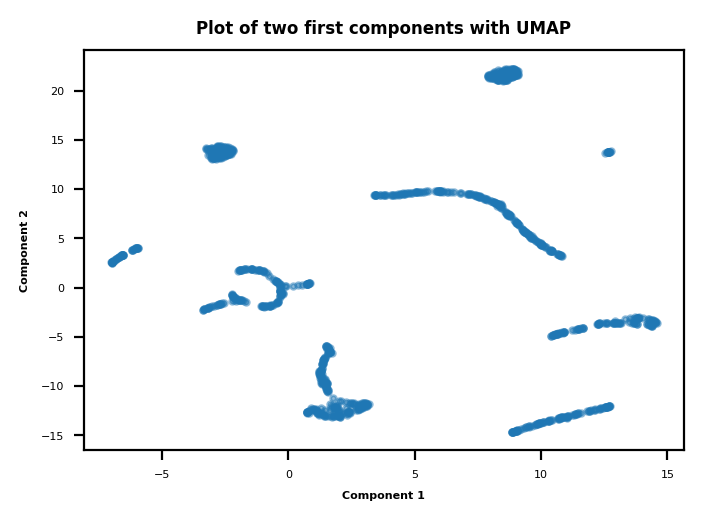

In [ ]:
# To plot 2 first principal componennts of data using UMAP
fig = plt.figure(figsize=(3, 2), dpi=200)
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(X_umap_2d[:, 0], X_umap_2d[:, 1], "o", markersize=2, alpha=0.5)
ax.set_title("Plot of two first components with UMAP"  , fontsize=6, loc="center", weight="bold")

ax.set_xlabel("Component 1", fontsize=4, weight="bold")
ax.tick_params(axis='x', labelsize=4)

ax.set_ylabel("Component 2", fontsize=4, weight="bold")
ax.tick_params(axis='y', labelsize=4);

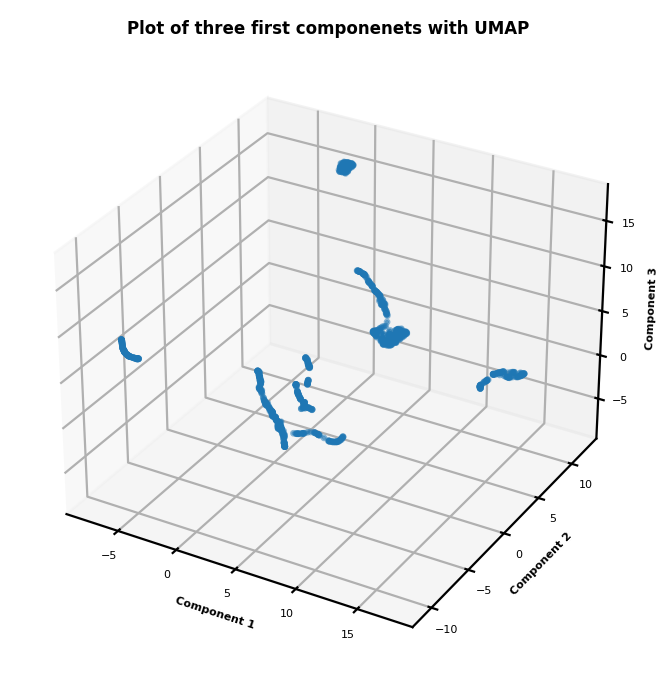

In [ ]:
# To plot 3 first principal componennts of data using UMAP
fig = plt.figure(figsize=(6, 4), dpi=200)
ax = fig.add_subplot(111, projection = "3d" )
ax.scatter(X_umap_3d[:, 0], X_umap_3d[:, 1], X_umap_3d[:, 2], s=2, alpha=0.5)

ax.set_xlabel("Component 1", fontsize=4, labelpad=-10, weight="bold")
ax.tick_params(axis='x', labelsize=4, pad=-3)

ax.set_ylabel("Component 2", fontsize=4, labelpad=-10, weight="bold")
ax.tick_params(axis='y', labelsize=4, pad=-3)

ax.set_zlabel("Component 3", fontsize=4, labelpad=-10, rotation=90, weight="bold")
ax.tick_params(axis='z', labelsize=4, pad=-3)

ax.set_title("Plot of three first componenets with UMAP"  , fontsize=6, loc="center", weight="bold");

**1-3. Statistical analysis:**

calculate mean, median and standard deviation of each feature. are there any features with unusuall distribution?

Following cell describes information of data. In the next cell, box plots of data will be shown. As the plot shows the features number 3 to 9 have partly unusual distribution because lots of their samples are outliers, place beyond whiskers.  



In [ ]:
# To dscribe statistical analysis of data
data_df.describe()

,0,1,2,3,4,5,6,7,8,9
count,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,9.600000,16.000000,7.105427e-17,7.105427e-17,5.684342e-17,-8.526513e-17,-2.842171e-17,4.973799e-17,7.105427e-17,3.552714e-17
std,9.072724,15.027236,1.262376e+00,9.979960e-01,4.463174e-01,4.463174e-01,4.463174e-01,4.463174e-01,4.463174e-01,4.463174e-01
min,-1.998575,-2.334028,-2.539774e+00,-4.008339e+00,-1.849478e+00,-1.759452e+00,-1.861308e+00,-1.886905e+00,-2.126307e+00,-1.765256e+00
25%,0.309105,0.360104,-1.006501e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.299342,19.141101,1.612305e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,19.454824,21.241760,9.153497e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,22.692985,42.932004,4.036427e+00,7.424209e+00,1.787044e+00,1.883213e+00,1.836862e+00,1.803226e+00,1.886478e+00,1.823437e+00


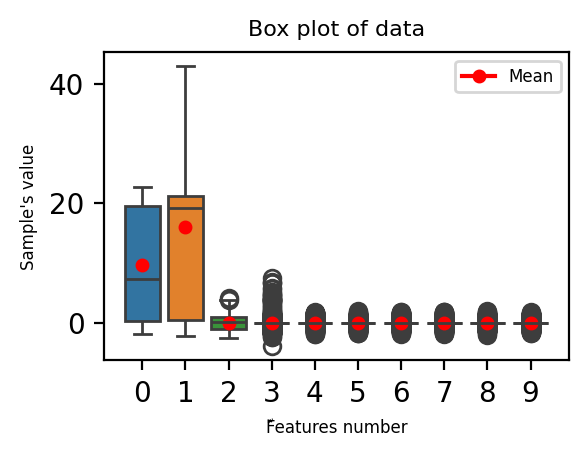

In [ ]:
plt.figure(figsize= (3, 2), dpi = 200)
ax = sns.boxplot(data=data_df)
for idx, mean in enumerate(data_df.mean()):
  ax.plot(idx, mean, marker="o", color ="red", markersize=4, label='Mean' if idx==0 else "")
plt.title("Box plot of data", fontsize = 8)
plt.xlabel("ّFeatures number", fontsize = 6)
plt.ylabel("Sample's value", fontsize = 6)
plt.legend(fontsize = 6);


**1-4. calculate covariance matrix between features:**

Diagonal elements of covariance matrix show the variance of each individual feature, and Off-diagonal elements show covariance between pairs of different features.
Positive value shows that the two features tend to increase and decrease together, Negative ones indicate as one of features increases the other tends to decrease.
Zero value indicate there is no linear relationship between the features.
The values of matrix shows that the highest relatinship is between the features number 0 and 1 so that increasing the one results in decreasing the other and vice versa.  

In [ ]:
# To calculate covariance matrix
cov_matrix = data_df.cov()
cov_matrix

,0,1,2,3,4,5,6,7,8,9
0,82.314314,-9.607138,0.186614,0.032907,0.172451,0.172490,0.175179,0.176076,0.177322,0.174089
1,-9.607138,225.817818,1.036277,0.496822,0.170214,0.178317,0.168391,0.174019,0.174735,0.172255
2,0.186614,1.036277,1.593594,0.670194,0.171576,0.174724,0.169692,0.171875,0.171852,0.172181
3,0.032907,0.496822,0.670194,0.995996,0.174316,0.178325,0.172359,0.173562,0.172134,0.174197
4,0.172451,0.170214,0.171576,0.174316,0.199199,0.173447,0.171158,0.174397,0.170915,0.170541
5,0.172490,0.178317,0.174724,0.178325,0.173447,0.199199,0.172864,0.172677,0.172696,0.174537
6,0.175179,0.168391,0.169692,0.172359,0.171158,0.172864,0.199199,0.173483,0.174325,0.169572
7,0.176076,0.174019,0.171875,0.173562,0.174397,0.172677,0.173483,0.199199,0.171867,0.171634
8,0.177322,0.174735,0.171852,0.172134,0.170915,0.172696,0.174325,0.171867,0.199199,0.171608
9,0.174089,0.172255,0.172181,0.174197,0.170541,0.174537,0.169572,0.171634,0.171608,0.199199


**2. Clustering**

Following 3 different methods of clustering, KMeansm, DBSCAN and hierarchycal clustering will apply to data.

**2-1.:** First, KMeans clustering is applied to data. To get better result the appropriate number of clusters should be obtained. To this, Elbow Method, Silhouette score and Davies-Bouldin Index will be considered.

In [ ]:
# To scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_df)
data_scaled.shape

(1000, 10)

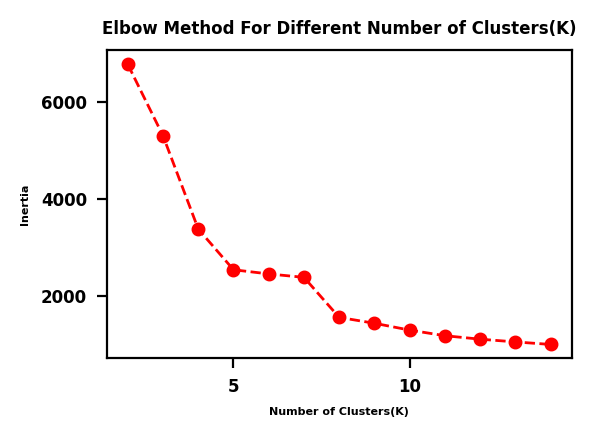

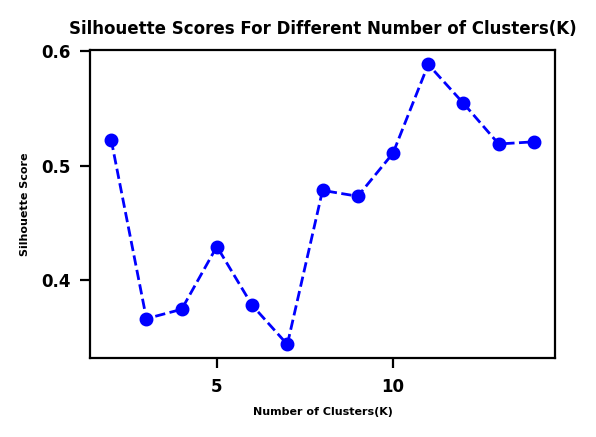

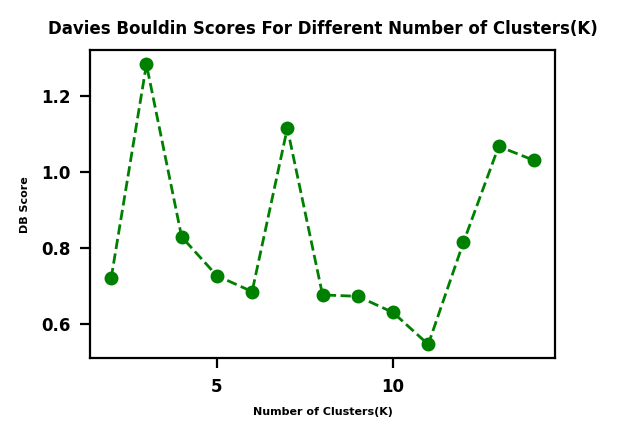

In [ ]:
# To obtain the best number of clusters in KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

inertia_val = []
silhouette_scores = []
davies_bouldin_scores = []
for k in range(2, 15):
  kmeans = KMeans(n_clusters=k, random_state=42)
  labels = kmeans.fit_predict(data_scaled)
  inertia_val.append(kmeans.inertia_)
  silhouette_scores.append(silhouette_score(data_scaled, labels, metric = 'euclidean'))
  davies_bouldin_scores.append(davies_bouldin_score(data_scaled, labels))

def plot_metrics(score_val, title, ylabel, color):
  plt.figure(figsize = (3, 2), dpi = 200)
  plt.plot(range(2, 15), score_val, "o--", color = color, markersize = 4, linewidth = 1)
  plt.title(title, fontsize = 6, weight = "bold")
  plt.xlabel("Number of Clusters(K)", fontsize=4, weight = "bold")
  plt.ylabel(ylabel, fontsize=4, weight="bold")
  plt.xticks(fontsize=6, weight="bold")
  plt.yticks(fontsize=6, weight="bold")
  plt.show()

# To plot Elboe Method
plot_metrics(inertia_val, "Elbow Method For Different Number of Clusters(K)", "Inertia", "red")

# To plot Silhouette Score
plot_metrics(silhouette_scores, "Silhouette Scores For Different Number of Clusters(K)", "Silhouette Score", "blue")

# To plot Davies Bouldin Score
plot_metrics(davies_bouldin_scores, "Davies Bouldin Scores For Different Number of Clusters(K)", "DB Score", "green")



As it is shown in diagrams above, Elbow Method suggests that the best number of clusters is 5, but Silhouette and Davies-Bouldin scores indicate the best number is 11. This seems to be a contradiction. This is where Dimensionality Reduction can help, the diagrams which plotted using PCA, t_SNE and UMAP show that the numer of clusters are much more than 4. So the appropriate number of clusters regarding KMeans is 11.

In [ ]:
# To label points regarding KMeans
kmeans_model = KMeans(n_clusters = 11, random_state = 42)
labels = kmeans_model.fit_predict(data_scaled)
#data_df["Label"] = labels
#data_df.head()

**2-2.:** Now I want to use DBSCAN for clustering, as you know this algorithm has 2 main tunable parameters, eps and min_samples, following I try to tune these parameters. first, I use k-distance graph for guessing apropriate min_samples and then use different eps values with silhouette and DB-index to find the best eps too.

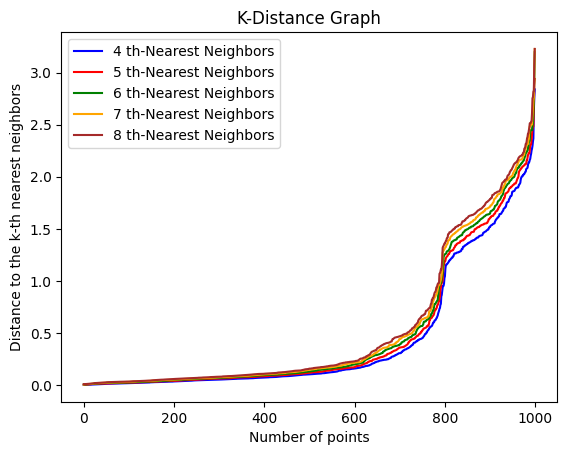

In [ ]:
# To plot k-distance Graph
from sklearn.neighbors import NearestNeighbors
color = ["blue", "red", "green", "orange", "brown"]
for k in range(4, 9):
  k_nearest_neighbors = NearestNeighbors(n_neighbors=k)
  k_nearest_neighbors.fit(data_scaled)
  distances, neighbors = k_nearest_neighbors.kneighbors(data_scaled)
  k_nearest_distances = np.sort(distances[:, k-1])
  plt.title("K-Distance Graph")
  plt.plot(k_nearest_distances, color = color[k-4], label =f"{k} th-Nearest Neighbors" )
  plt.xlabel("Number of points")
  plt.ylabel("Distance to the k-th nearest neighbors")
  plt.legend(fontsize=10)
plt.show()




Considering the plot above, I choose 6 for min_samples and eps in the range[0.2, 0.75]

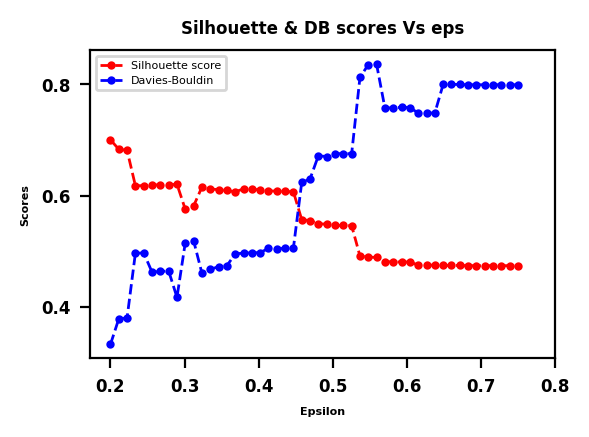

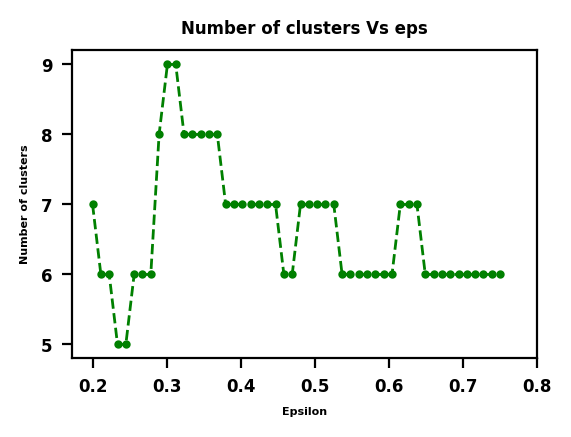

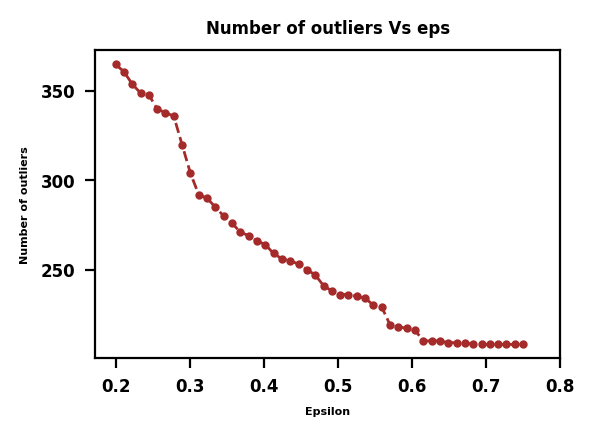

In [ ]:
# To find the best value for epsilon
from sklearn.cluster import DBSCAN
silhouette_scores = []
davies_bouldin_scores = []
n_clusters = []
n_outlier = []
# Choose several points to epsilon
for eps in np.linspace(0.2, 0.75, 50):
  dbscan = DBSCAN(eps=eps, min_samples=6)
  labels = dbscan.fit_predict(data_scaled)
  # Selecting the non outlier indices
  non_outlier_idx = labels != -1
  # To select points which are not outlier
  clustered_data = data_scaled[non_outlier_idx]
  # To find the number of clusters
  n_clusters.append(len(np.unique(labels[non_outlier_idx])))
  # To find the number of outliers
  n_outlier.append(int(np.sum(labels==-1)))
  # To calculate Silhouette scores
  silhouette_scores.append(silhouette_score(clustered_data, labels[non_outlier_idx], metric='euclidean'))
  # To calculate davies-bouldin scores
  davies_bouldin_scores.append(davies_bouldin_score(clustered_data, labels[non_outlier_idx]))


plt.figure(figsize = (3, 2), dpi=200)
desired_xticks = np.linspace(.2, .8, 7)
# To plot Silhouette and davies-bouldin Vs eps
plt.plot(np.linspace(0.2, 0.75, 50), silhouette_scores, "o--", color = "red", markersize=2, linewidth=1, label="Silhouette score")
plt.plot(np.linspace(0.2, 0.75, 50), davies_bouldin_scores, "o--", color = "blue", markersize = 2, linewidth = 1, label="Davies-Bouldin")
plt.title("Silhouette & DB scores Vs eps", fontsize=6, weight="bold")
plt.xlabel("Epsilon", fontsize=4, weight="bold")
plt.ylabel("Scores", fontsize=4, weight="bold")
plt.xticks(desired_xticks, fontsize=6, weight="bold")
plt.yticks(fontsize=6, weight="bold")
plt.legend(fontsize=4)
plt.show()

# To plot number of clusters Vs eps
plt.figure(figsize = (3, 2), dpi=200)
plt.plot(np.linspace(0.2, 0.75, 50), n_clusters, "o--", color = "green", markersize=2, linewidth=1)
plt.title("Number of clusters Vs eps", fontsize=6, weight="bold")
plt.xlabel("Epsilon", fontsize=4, weight="bold")
plt.ylabel("Number of clusters", fontsize=4, weight="bold")
plt.xticks(desired_xticks,fontsize=6, weight="bold")
plt.yticks(fontsize=6, weight="bold")
plt.show()

# To plot number of outliers Vs eps
plt.figure(figsize = (3, 2), dpi=200)
plt.plot(np.linspace(0.2, 0.75, 50), n_outlier, "o--", color = "brown", markersize=2, linewidth=1)
plt.title("Number of outliers Vs eps", fontsize=6, weight="bold")
plt.xlabel("Epsilon", fontsize=4, weight="bold")
plt.ylabel("Number of outliers", fontsize=4, weight="bold")
plt.xticks(desired_xticks,fontsize=6, weight="bold")
plt.yticks(fontsize=6, weight="bold")
plt.show()


Considering the first plot above (Scores Vs Epsilon), the best value for epsilon may be 0.32 which suggests that (in the second plot) the the number of clusters is better to be 8.

**2-3:** Here the last method of clustering, Hierarchycal clustering, will be applied to data.

In [ ]:
# To MinMax scaling of data.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
# To transform data with MinMaxScaler
data_df_scaled = scaler.fit_transform(data_df)
data_df_scaled = pd.DataFrame(data_df_scaled, columns=data_df.columns)

In [ ]:
# To import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# To import dendrogram and hierarchy
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

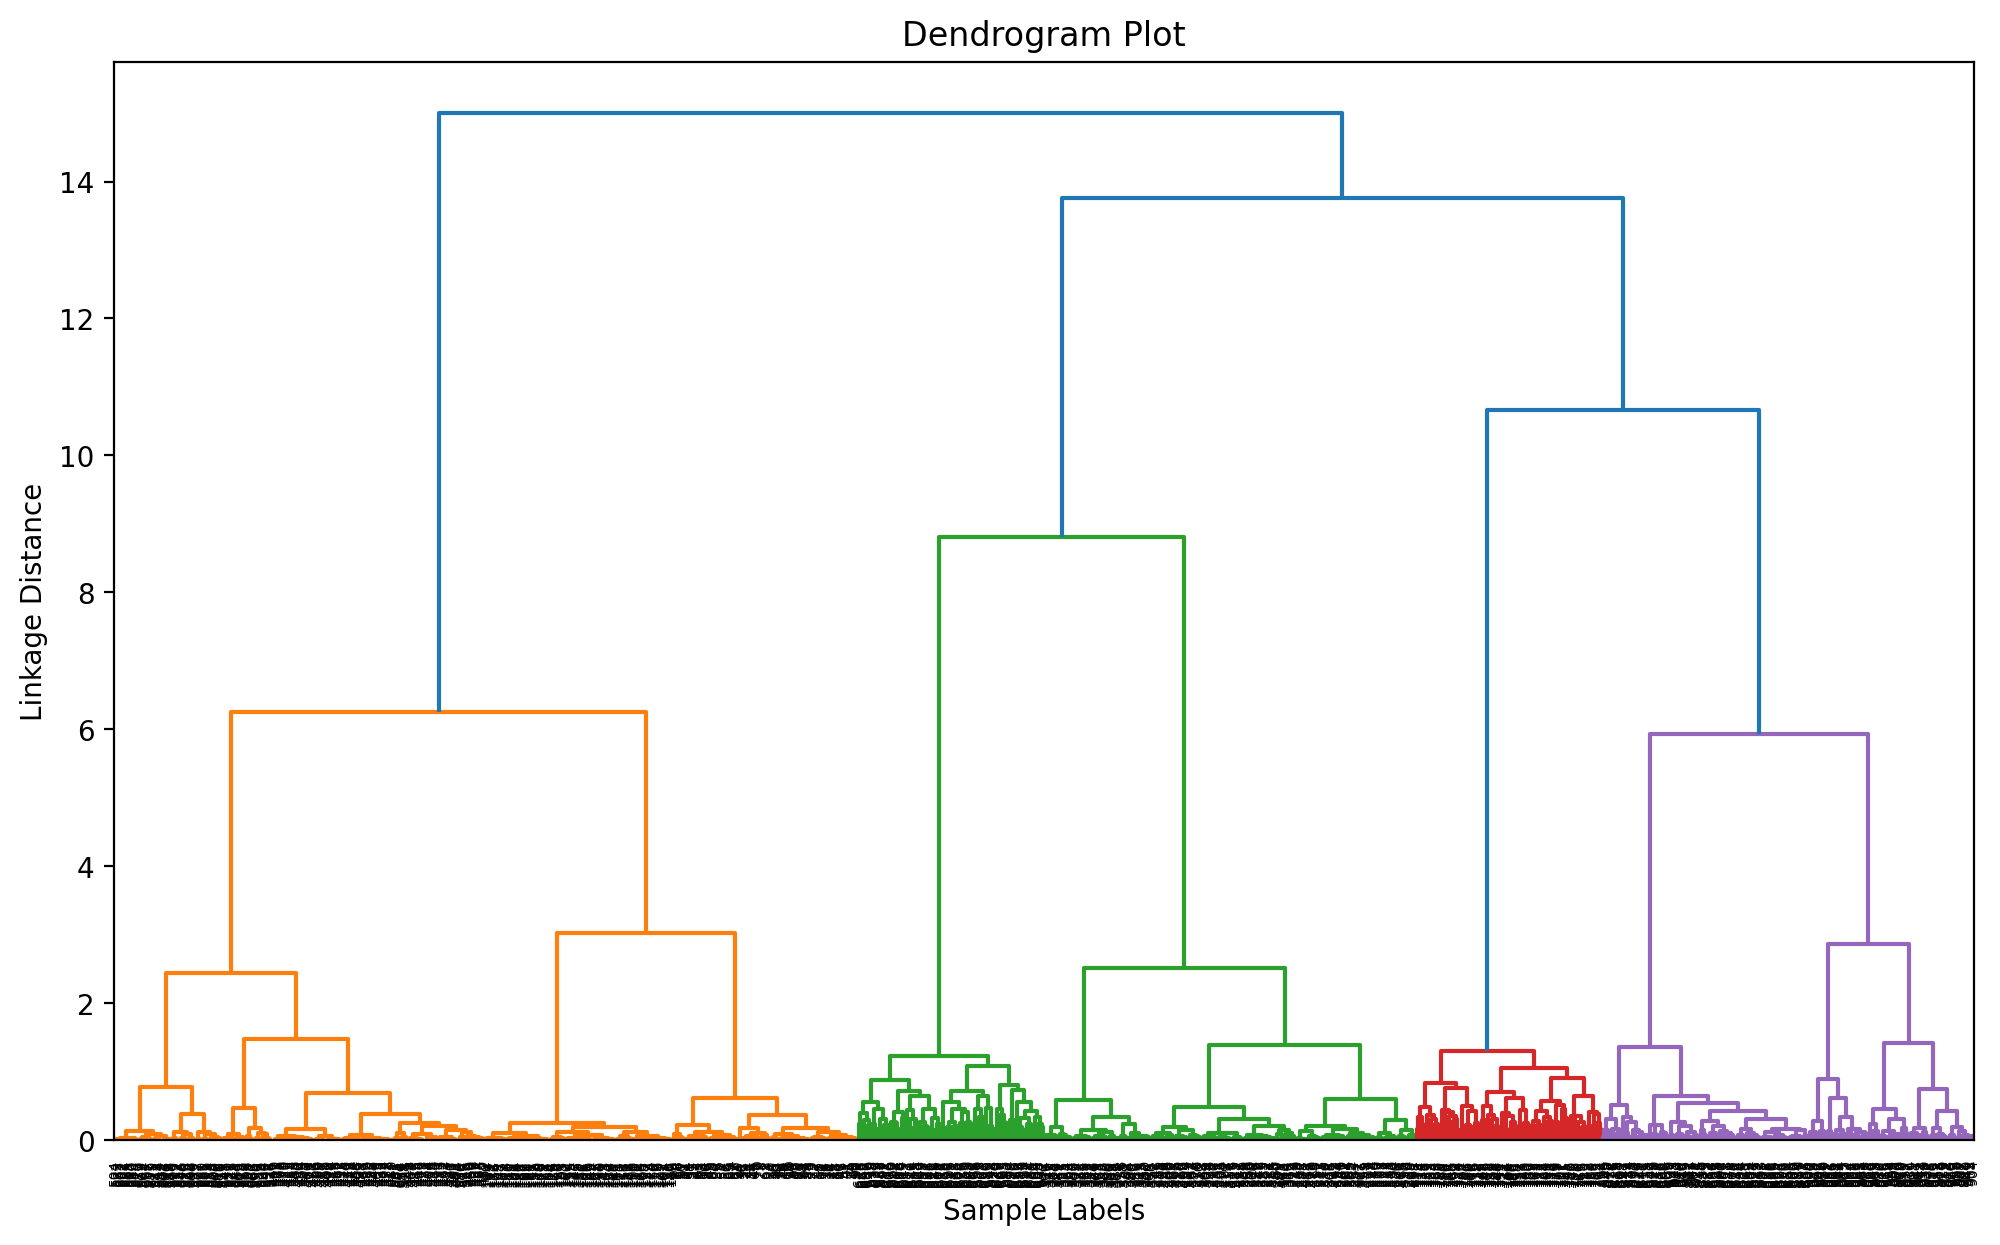

In [ ]:
# To calculate Linkage Matrix for all clusters
linkage_matrix = hierarchy.linkage(data_df_scaled, method='ward')

# To plot dendrogram
plt.figure(figsize=(12, 7), dpi=200)
dendrogram = hierarchy.dendrogram(linkage_matrix)
plt.title("Dendrogram Plot")
plt.xlabel("Sample Labels")
plt.ylabel("Linkage Distance")
plt.show()

The dendrogram of agglomerative clustering is shown above, as it is clear to find the best number of clusters some several numbers will be choosen according to dendrogram above,  and the appropriate scores will be calculated for them.

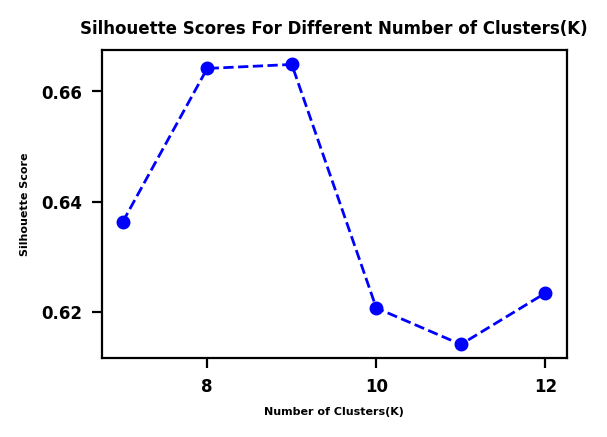

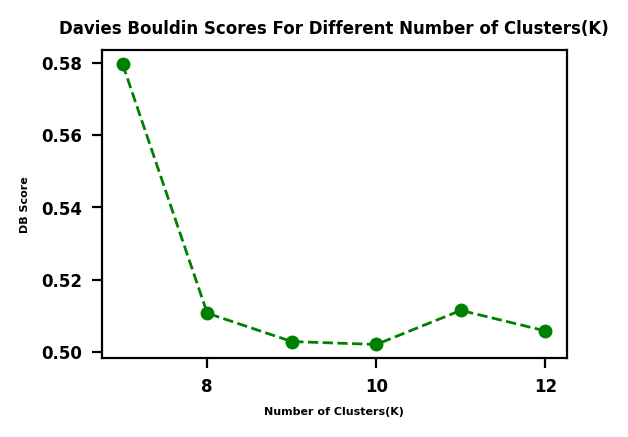

In [ ]:
# To find the approximate values of number of clusters
silhouette_scores = []
davies_bouldin_scores = []
for n_cluster in range(7, 13):
  model = AgglomerativeClustering(n_clusters=n_cluster,distance_threshold=None)
  labels = model.fit_predict(data_df_scaled)
  silhouette_scores.append(silhouette_score(data_df_scaled, labels, metric='euclidean'))
  davies_bouldin_scores.append(davies_bouldin_score(data_df_scaled, labels))

def plot_metrics(score_val, title, ylabel, color):
  plt.figure(figsize = (3, 2), dpi=200)
  plt.plot(range(7, 13), score_val, "o--", color=color, markersize=4, linewidth=1)
  plt.title(title, fontsize=6, weight="bold")
  plt.xlabel("Number of Clusters(K)", fontsize=4, weight="bold")
  plt.ylabel(ylabel, fontsize=4, weight="bold")
  plt.xticks(fontsize=6, weight="bold")
  plt.yticks(fontsize=6, weight="bold")
  plt.show()

# To plot Silhouette Score
plot_metrics(silhouette_scores, "Silhouette Scores For Different Number of Clusters(K)", "Silhouette Score", "blue")

# To plot Davies Bouldin Score
plot_metrics(davies_bouldin_scores, "Davies Bouldin Scores For Different Number of Clusters(K)", "DB Score", "green")



Regarding 2 plots above, which shows the Silhouette and DB scores per number of clusters,  the best number of clusters may be 8 or 9. So following The number of samples per each cluster is considered as another criteria.   

/tmp/ipython-input-46-112661088.py:6: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  plt.plot(pd.value_counts(pd.Series(labels)).sort_index(), marker=marker[n_cluster-8], color=color[n_cluster-8], label=f"{n_cluster}-clusters", markersize=6, ls ="--", lw =1)
/tmp/ipython-input-46-112661088.py:6: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  plt.plot(pd.value_counts(pd.Series(labels)).sort_index(), marker=marker[n_cluster-8], color=color[n_cluster-8], label=f"{n_cluster}-clusters", markersize=6, ls ="--", lw =1)


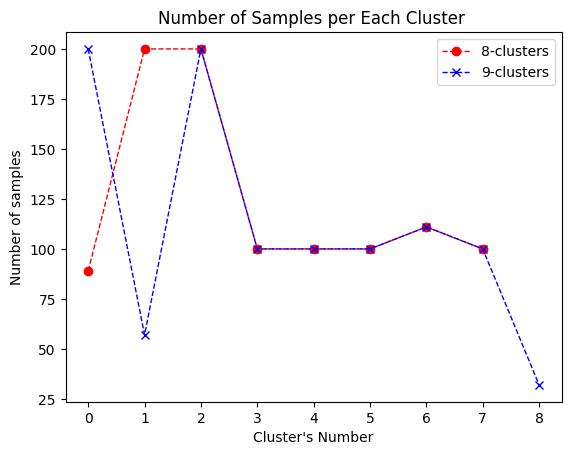

In [ ]:
color = ["red", "blue"]
marker = ["o", "x"]
for n_cluster in range(8, 10):
  model = AgglomerativeClustering(n_clusters=n_cluster,distance_threshold=None)
  labels = model.fit_predict(data_df_scaled)
  plt.plot(pd.value_counts(pd.Series(labels)).sort_index(), marker=marker[n_cluster-8], color=color[n_cluster-8], label=f"{n_cluster}-clusters", markersize=6, ls ="--", lw =1)
  plt.xlabel("Cluster's Number")
  plt.ylabel("Number of samples")
  plt.title("Number of Samples per Each Cluster ")
  plt.legend()
plt.show();


The plot above, shows that if the number of clusters be 9, two clusters contain somewhat small number of points (about 30 and 50) which is not seems to be correct according to the reduced space plots. So it may make more sense if the number of clusters equals to 8.

**2-4: Compare the results of different Algorithm:**

Now the hyperparameters of differnt algorithm are identified, so in the next cell the results of them are compared together.

In [ ]:
# To normalized data to use in KMeans and DBSCAN
scaler_normal = StandardScaler()
data_normalized = scaler_normal.fit_transform(data_df)
# To MinMax Scaling data to use in hierarchycal clustering
scaler_minmax = MinMaxScaler()
data_scaled = scaler_minmax.fit_transform(data_df)

## To find scores for KMeans model
kmeans = KMeans(n_clusters=11, random_state=42)
kmeans_labels = kmeans.fit_predict(data_normalized)
silhouette_kmeans = silhouette_score(data_normalized, kmeans_labels, metric ='euclidean')
davies_kmeans = davies_bouldin_score(data_normalized, kmeans_labels)

## To find scores for DBSCAN model
dbscan = DBSCAN(eps = 0.32, min_samples=6)
dbscan_labels = dbscan.fit_predict(data_normalized)
non_outlier_idx = dbscan_labels != -1
clustered_data = data_normalized[non_outlier_idx]
silhouette_dbscan = silhouette_score(clustered_data, dbscan_labels[non_outlier_idx], metric = 'euclidean')
davies_dbscan = davies_bouldin_score(clustered_data, dbscan_labels[non_outlier_idx])

## To find scores for Agglomerative model
agglo = AgglomerativeClustering(n_clusters=8,distance_threshold=None)
agglo_labels = model.fit_predict(data_df_scaled)
silhouette_agglo = silhouette_score(data_scaled, agglo_labels, metric ='euclidean')
davies_agglo = davies_bouldin_score(data_scaled, agglo_labels)

silhouette_scores = [silhouette_kmeans, silhouette_dbscan, silhouette_agglo]
DB_index = [davies_kmeans, davies_dbscan, davies_agglo]
score_df = pd.DataFrame({"Silhouette":silhouette_scores, "DB_index":DB_index}, index = ["KMeans", "DBSCAN", "Hierarchy"])
score_df

,Silhouette,DB_index
KMeans,0.588349,0.546817
DBSCAN,0.581566,0.519124
Hierarchy,0.664910,0.502837


Regarding DataFrame above, Hierarchy is better than DBSCAN and DBSCAN is better than KMeans for clustering. Kmeans is best for spherical and roughly equal size data but DBSCAN is more appropriate for arbitrary shape data. As we saw in scatterplot of data the clusters of this dataset are not spherical so KMeans can't do well on them. Moreover, Hierarchycal clustering is somewhat better than DBSCAN.


**3-2: Anomaly detection: how to find anomaly points in data?**

 one of the best ways to find anomaly points is using DBSCAN, this model beased on density of points so it can determine outlier points.


In [ ]:
# To find the indices of outlier points.
dbscan = DBSCAN(eps =0.32, min_samples=6)
labels = dbscan.fit_predict(data_normalized)
# Selecting the outlier indices
outlier_idx = np.where(labels==-1)[0]
outlier_idx

array([ 34, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611,
       612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624,
       625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637,
       638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650,
       651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663,
       664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676,
       677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689,
       690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702,
       703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715,
       716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728,
       729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741,
       742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754,
       755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767,
       768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 77